# [Введение в seaborn](https://telegra.ph/Vvedenie-v-seaborn-02-01-2)

In [3]:
!pip install seaborn

     -------------------------------------- 293.3/293.3 kB 2.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import seaborn as sns

In [5]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Статистическая визуализация
seaborn.relplot() — метод, который позволяет строить графики для визуализации отношений между двумя переменными. Параметр kind, отвечающий за вид графика, по умолчанию имеет значение «scatter». Если его не изменить, то на выходе получится обычный scatterplot, или диаграмма рассеяния.

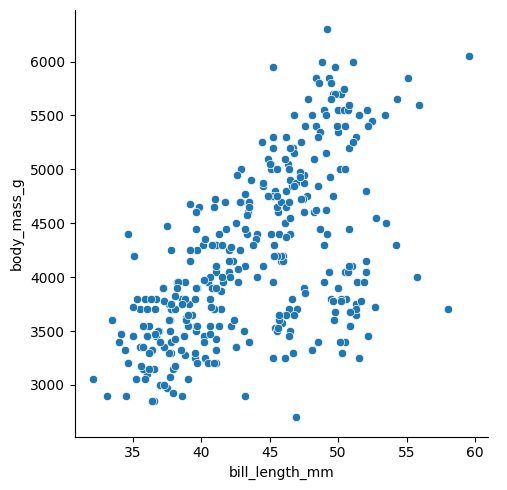

In [8]:
stat_visualize = sns.relplot(data=penguins, x="bill_length_mm", y="body_mass_g")
stat_visualize.add_legend()

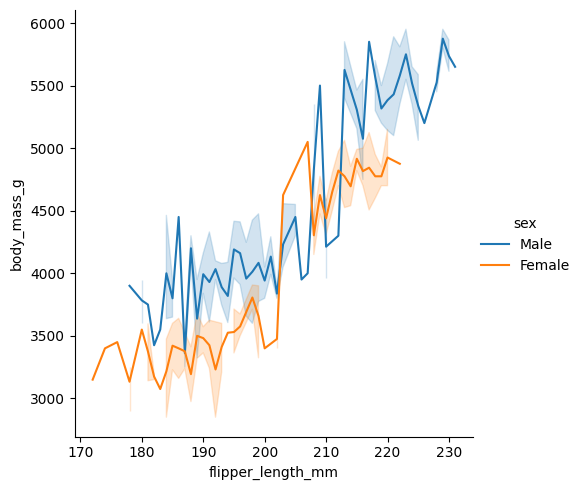

In [9]:
sns.relplot(data=penguins, x="flipper_length_mm", y="body_mass_g", kind="line", hue='sex')

## Визуализация распределений

sns.displot() — вид графиков, отражающих распределение переменной.

По умолчанию параметр kind имеет значение «hist», поэтому получаем диаграмму распределения возраста пассажиров Титаника с разбиением на классы кают:

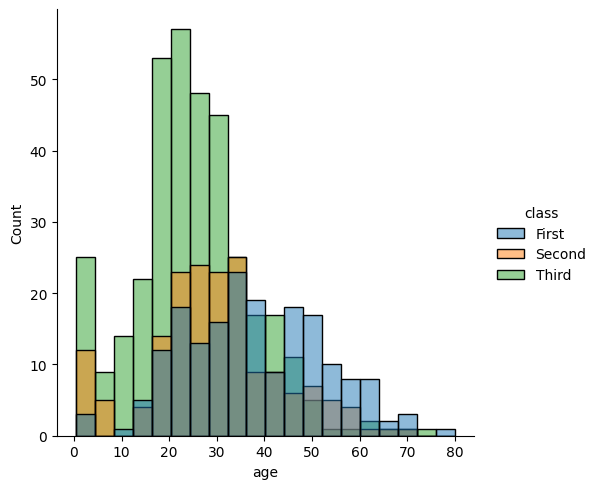

In [12]:
sns.displot(titanic, x="age", hue='class')


Если мы установим `kind="kde"`, то получим кривую плотности распределения вероятностей, основанной на методе ядерной оценки плотности. По горизонтальной оси расположены значения переменной, а по вертикальной оси — оценка плотности распределения.

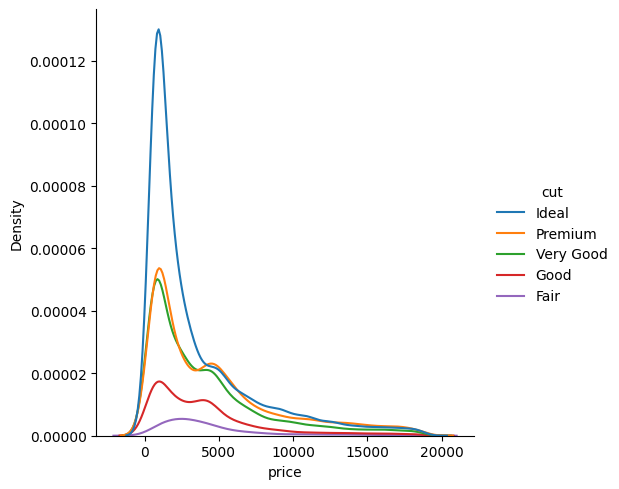

In [13]:
sns.displot(diamonds, x="price", hue="cut", kind="kde")

Если мы передадим в sns.displot() сразу `две переменные`, то получим двумерную гистограмму или, другими словами, heatmap.

Тепловая карта соотношения длины и глубины клюва пингвинов:

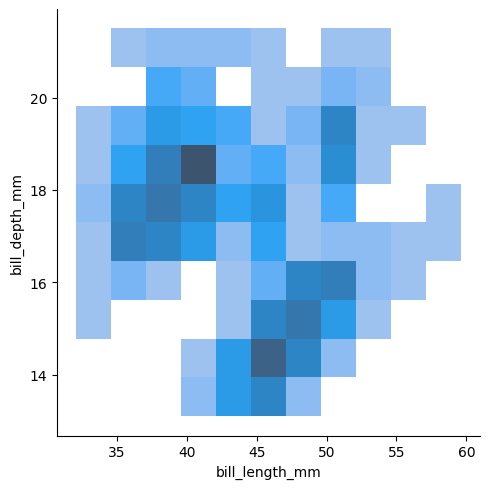

In [14]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

sns.jointplot — очень красивый вариант визуализации, который есть только в библиотеке seaborn. Этот график отображает зависимости между двумя переменными с двумерными и одномерными визуализациями. Если мы не будем задавать аргумент kind, то получим диаграмму рассеяния между двумя переменными и отдельные кривые плотности (основанные на ядерной оценке) по осям x и y. На jointplot также можно добавить разбивку по категориям, указав параметр hue.

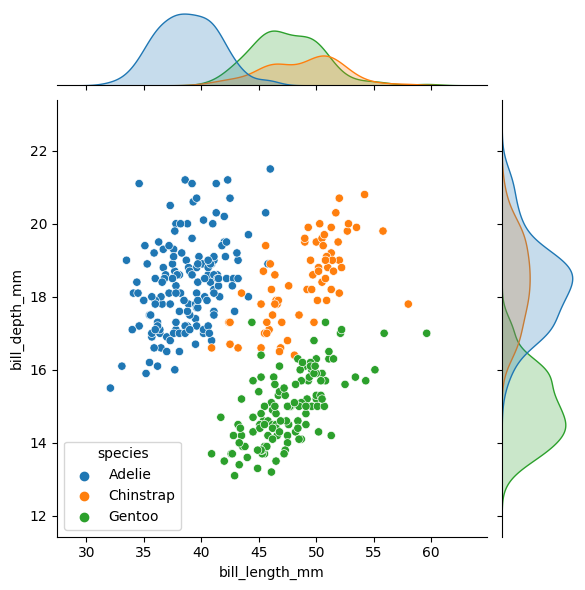

In [15]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

## Визуализация категориальных данных

sns.catplot() - метод, позволяющий визуализировать данные с разбивкой по категориям. Catplot может пригодиться, если есть необходимость отразить на одном графике зависимость непрерывной переменной сразу от нескольких категориальных переменных.

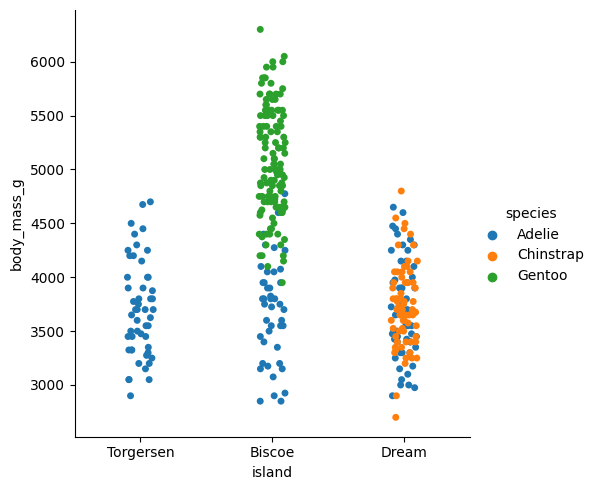

In [16]:
sns.catplot(data=penguins, x="island", y="body_mass_g", hue="species")

Если установим kind="box", то получим знакомый нам boxplot. Если ящик с усами получается очень узким, можно отфильтровать выбросы, чтобы график получился более наглядным.

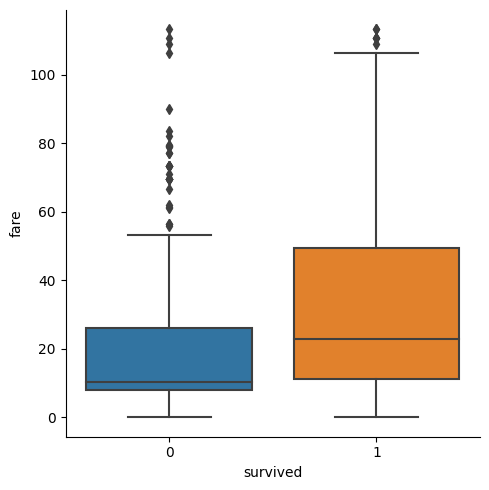

In [17]:
sns.catplot(data=titanic[titanic['fare'] < 120], x="survived", y="fare", kind="box")

Ещё один очень красивый график — violin plot (скрипичная диаграмма). Violin plot — это небольшие boxplot с добавлением по бокам кривых плотности ядра с каждой стороны.

Seaborn позволяет строить её очень просто, используя метод sns.catplot() и параметр kind="violin".

Построим скрипичный график распределения длины клюва пингвинов с разбивкой по виду и полу:

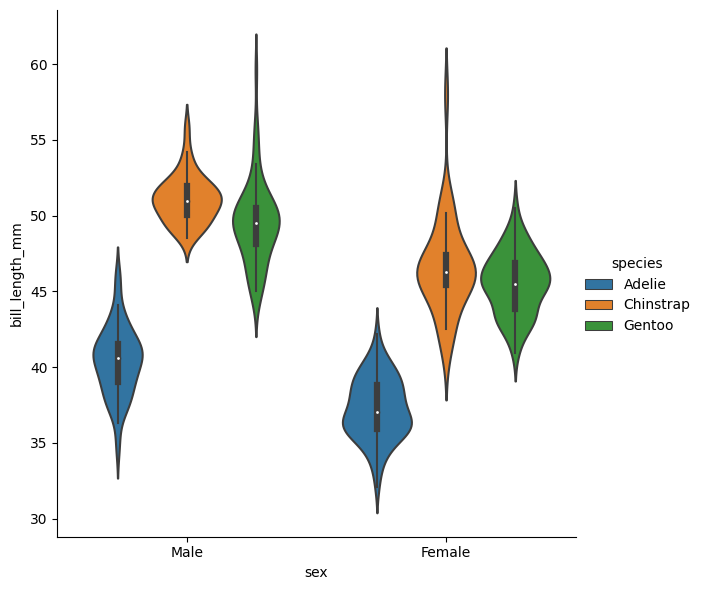

In [18]:
sns.catplot(data=penguins, x="sex", y="bill_length_mm", hue="species", kind="violin", height=6)

Чтобы построить обычный countplot — столбчатую диаграмму, отражающую количество объектов в каждой категории — нужно установить параметр kind="count".

Количество пингвинов на разных островах:

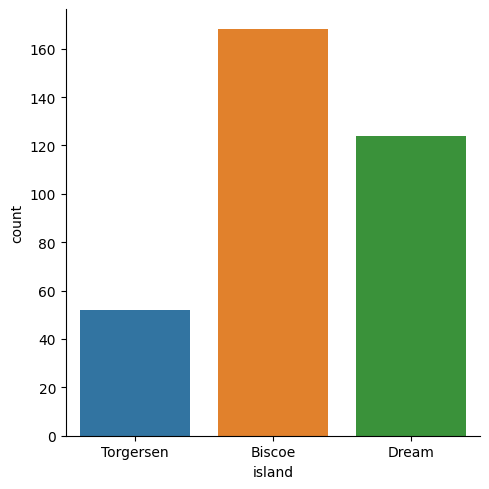

In [19]:
sns.catplot(data=penguins, x="island", kind="count")

Для построения barplot нужно установить параметр kind="bar". Столбцы на графике пропорциональны величинам, которые они отображают.

Посмотрим на зависимость цвета и веса бриллиантов в каратах:

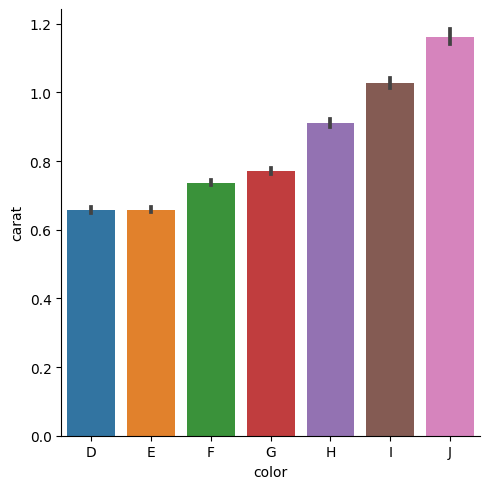

In [20]:
sns.catplot(data=diamonds, x="color", y="carat", kind="bar")

Последний вид диаграммы, которую позволяет строить sns.catplot(), — это pointplot. Pointplot похож на barplot, если мысленно дорисовать столбцы до каждой точки, но вместо столбцов график отображает точечную оценку категорий и строит доверительный интервал.

Для его построения достаточно передать в sns.catplot() аргумент kind="point".

Построим зависимость выживаемости пассажиров «Титаника» от их пола и дополнительно разобьём график по полу пассажиров и классам кают:

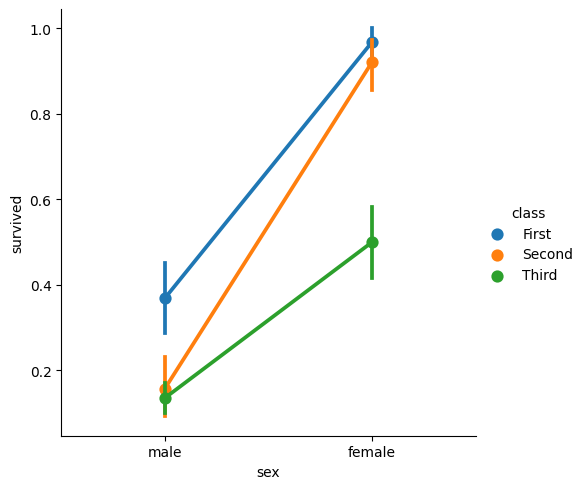

In [21]:
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="point")

https://seaborn.pydata.org/index.html